1.3.1
12 WSIs:  ['22_09617A1_7', '22_16541A1_7', '22_19269A1_7', '22_21450A1_7', '22_23859A1_7', '23_00376A1_7', '23_08116A1_7', '23_08703A1_7', '23_09909A1_7', '23_11101A1_7', '23_13438A1_7', '23_17699A1_7']
9 Train WSIs:  ['22_09617A1_7', '22_16541A1_7', '22_21450A1_7', '22_23859A1_7', '23_00376A1_7', '23_08116A1_7', '23_09909A1_7', '23_13438A1_7', '23_17699A1_7']
3 Test WSIs:  ['22_19269A1_7', '23_08703A1_7', '23_11101A1_7']
22_09617A1_7 test class: Mieloblasty


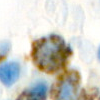

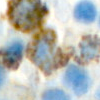

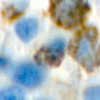

22_16541A1_7 test class: Mieloblasty


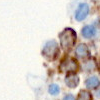

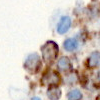

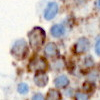

22_21450A1_7 test class: Mieloblasty


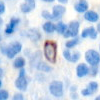

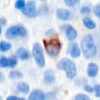

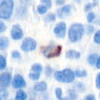

22_23859A1_7 test class: Mieloblasty


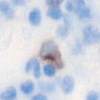

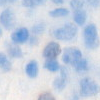

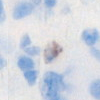

23_00376A1_7 test class: Mieloblasty


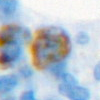

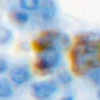

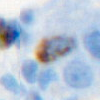

23_08116A1_7 test class: Mieloblasty


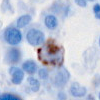

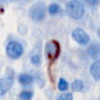

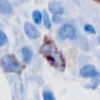

23_09909A1_7 test class: Mieloblasty


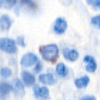

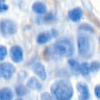

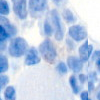

23_13438A1_7 test class: Mieloblasty


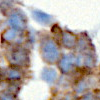

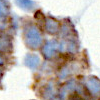

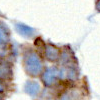

23_17699A1_7 test class: Mieloblasty


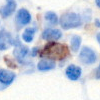

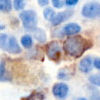

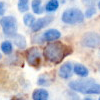

22_09617A1_7 test class: Megakariocyty
22_16541A1_7 test class: Megakariocyty
22_21450A1_7 test class: Megakariocyty


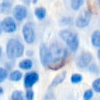

22_23859A1_7 test class: Megakariocyty
23_00376A1_7 test class: Megakariocyty


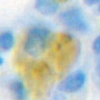

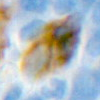

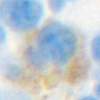

23_08116A1_7 test class: Megakariocyty


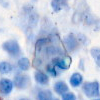

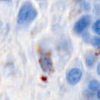

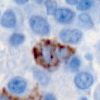

23_09909A1_7 test class: Megakariocyty


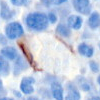

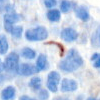

23_13438A1_7 test class: Megakariocyty


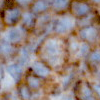

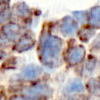

23_17699A1_7 test class: Megakariocyty


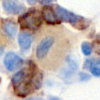

22_09617A1_7 test class: Komorki


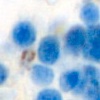

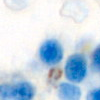

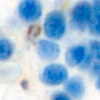

22_16541A1_7 test class: Komorki


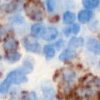

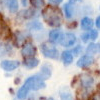

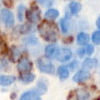

22_21450A1_7 test class: Komorki


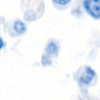

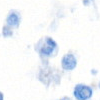

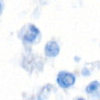

22_23859A1_7 test class: Komorki


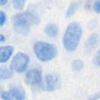

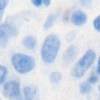

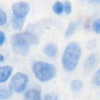

23_00376A1_7 test class: Komorki


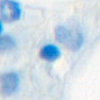

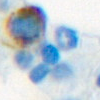

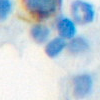

23_08116A1_7 test class: Komorki


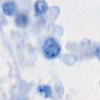

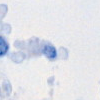

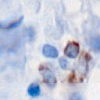

23_09909A1_7 test class: Komorki
23_13438A1_7 test class: Komorki
23_17699A1_7 test class: Komorki
22_19269A1_7 train class: Mieloblasty


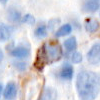

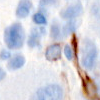

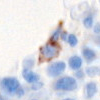

23_08703A1_7 train class: Mieloblasty


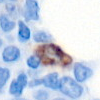

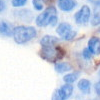

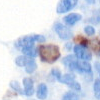

23_11101A1_7 train class: Mieloblasty


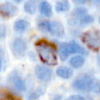

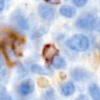

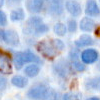

22_19269A1_7 train class: Megakariocyty


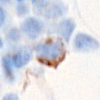

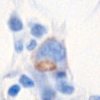

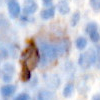

23_08703A1_7 train class: Megakariocyty


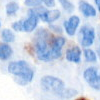

23_11101A1_7 train class: Megakariocyty


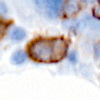

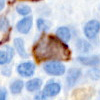

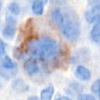

22_19269A1_7 train class: Komorki


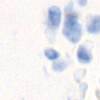

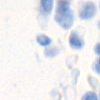

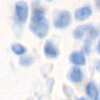

23_08703A1_7 train class: Komorki
23_11101A1_7 train class: Komorki


In [1]:
from slide_tiling.tiling import save_tile_images
from pathlib import Path

DATA = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_adnotacje_final"
OUT = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_tiles"

all_wsi = [
    subdir_name.name for subdir_name in Path(DATA).iterdir() if subdir_name.is_dir()
]

test_wsi = [
    "22_19269A1_7",
    "23_08703A1_7",
    "23_11101A1_7",
]

excluded = set("23_24187A1_7")

train_wsi = [wsi for wsi in all_wsi if wsi not in set(test_wsi) and wsi not in excluded]

selected_classes = ["Mieloblasty", "Megakariocyty", "Komorki"]

print(len(all_wsi), "WSIs: ", all_wsi)
print(len(train_wsi), "Train WSIs: ", train_wsi)
print(len(test_wsi),  "Test WSIs: ", test_wsi)

Path(OUT).mkdir(parents=True, exist_ok=True)
save_tile_images(
    train_wsi_names=train_wsi,
    test_wsi_names=test_wsi,
    data_dir=DATA,
    out_dir=OUT,
    selected_classes=selected_classes,
    bbox_size=(100, 100),
    show_n=3
    )

In [15]:
import xml.etree.ElementTree as ET
from pathlib import Path

DATA = "C:\\Users\\MS\\Desktop\\IDEAS\\Projekty\\CD34\\Dane\\CD34_adnotacje_final"
all_wsi = [
    subdir_name.name for subdir_name in Path(DATA).iterdir() if subdir_name.is_dir()
]

print(len(all_wsi))

n_megakariocyty = 0
n_mieloblasty = 0
n_komorki = 0
n_inne = 0
inne_nazwy = set()
for wsi in all_wsi:
    xml_path = Path(DATA, f"{wsi}.xml")

    tree = ET.parse(xml_path)
    root = tree.getroot()

    annotations = root.find("./Annotations")
    for annotation in annotations:
        if annotation.attrib["PartOfGroup"] == "Megakariocyty":
            n_megakariocyty = n_megakariocyty+1
        elif annotation.attrib["PartOfGroup"] == "Mieloblasty":
            n_mieloblasty = n_mieloblasty + 1
        elif annotation.attrib["PartOfGroup"] == "komorki":
            n_komorki = n_komorki + 1
        else:
            n_inne = n_inne+1
            inne_nazwy.add(annotation.attrib["PartOfGroup"])


print("Liczba megakariocytów: ", n_megakariocyty)
print("Liczba mieloblastów: ", n_mieloblasty)
print("Liczba komórek: ", n_komorki)
print("Pozostałe: ", n_inne)
print(inne_nazwy)

12
Liczba megakariocytów:  35
Liczba mieloblastów:  11182
Liczba komórek:  5845
Pozostałe:  1835
{'Artefakt', 'Artefekty', 'Obszary ', 'None', 'Obszary', 'Artefakty', 'Naczynia'}
